In [1]:
import time 
t_script = time.time()

### Load libraries, functions, palette, theme

In [2]:
%run __libraries.ipynb

In [3]:
%run __functions.ipynb

## Unbalanced Results

In [4]:
colors = [
    palette[1],
    palette[2],
    palette[-7],
    palette[-9],
    palette[-1]
]

In [5]:
models_list = [
    'Logistic Regression',
    'Random Forest',
    'XGBoost',
    'LightGBM'
]

In [6]:
metrics = [
    'AUC ROC',
    'Average Precision',
    'Card Precision@100'
]

In [7]:
techniques_list = ['Base', 'RUS', 'SMOTE+RUS', 'Wegited']

In [8]:
cols_drop = ['Fit Time', 'Score Time', 'Tuning Time']

### Load Results

In [9]:
performance_base = pd.read_pickle(r'_performance_base.pkl')
summary_base = pd.read_pickle(r'_summary_base.pkl')
time_exec_base = pd.read_pickle(r'_time_exec_base.pkl')

In [10]:
performance_unb = pd.read_pickle(r'_performance_unbalanced.pkl')
summary_unb = pd.read_pickle(r'_summary_unbalanced.pkl')
time_exec_unb = pd.read_pickle(r'_time_exec_unbalanced.pkl')

#### Base 

In [11]:
performance_lr_base = performance_base['Logistic Regression']
performance_rf_base = performance_base['Random Forest']
performance_xgb_base = performance_base['XGBoost']
performance_lgb_base = performance_base['LightGBM']

exec_time_lr_base = time_exec_base['Logistic Regression']
exec_time_rf_base = time_exec_base['Random Forest']
exec_time_xgb_base = time_exec_base['XGBoost']
exec_time_lgb_base = time_exec_base['LightGBM']

#### RUS

In [12]:
performance_lr_rus = performance_unb['Logistic Regression RUS']
performance_rf_rus = performance_unb['Random Forest RUS']
performance_xgb_rus = performance_unb['XGBoost RUS']
performance_lgb_rus = performance_unb['LightGBM RUS']

exec_time_lr_rus = time_exec_unb['Logistic Regression RUS']
exec_time_rf_rus = time_exec_unb['Random Forest RUS']
exec_time_xgb_rus = time_exec_unb['XGBoost RUS']
exec_time_lgb_rus = time_exec_unb['LightGBM RUS']

#### SMOTE+RUS

In [13]:
performance_lr_smrus = performance_unb['Logistic Regression SMOTE+RUS']
performance_rf_smrus = performance_unb['Random Forest SMOTE+RUS']
performance_xgb_smrus = performance_unb['XGBoost SMOTE+RUS']
performance_lgb_smrus = performance_unb['LightGBM SMOTE+RUS']

exec_time_lr_smrus = time_exec_unb['Logistic Regression SMOTE+RUS']
exec_time_rf_smrus = time_exec_unb['Random Forest SMOTE+RUS']
exec_time_xgb_smrus = time_exec_unb['XGBoost SMOTE+RUS']
exec_time_lgb_smrus = time_exec_unb['LightGBM SMOTE+RUS']

#### Weighted

In [14]:
performance_lr_weight = performance_unb['Logistic Regression Weighted']
performance_rf_weight = performance_unb['Random Forest Weighted']
performance_xgb_weight = performance_unb['XGBoost Weighted']
performance_lgb_weight = performance_unb['LightGBM Weighted']

exec_time_lr_weight = time_exec_unb['Logistic Regression Weighted']
exec_time_rf_weight = time_exec_unb['Random Forest Weighted']
exec_time_xgb_weight = time_exec_unb['XGBoost Weighted']
exec_time_lgb_weight = time_exec_unb['LightGBM Weighted']

### Logistic Regression

In [15]:
lr_performance_list = [
    performance_lr_base,
    performance_lr_rus,
    performance_lr_smrus,
    performance_lr_weight
]

In [16]:
lr_exec_time_list = [
    exec_time_lr_base,
    exec_time_lr_rus,
    exec_time_lr_smrus,
    exec_time_lr_weight
]

In [17]:
results_lr_args = techniques_list, lr_performance_list, lr_exec_time_list

In [18]:
unbalanced_lr = (results_df_create(*results_lr_args).drop(cols_drop, axis=1))

In [19]:
unbalanced_lr

,AUC ROC,AUC ROC Std,Average Precision,Average Precision Std,Card Precision@100,Card Precision@100 Std
Base,0.876,0.0178,0.614,0.0277,0.296,0.0157
RUS,0.876,0.0178,0.614,0.0282,0.298,0.0159
SMOTE+RUS,0.879,0.0172,0.578,0.0208,0.290,0.0182
Wegited,0.876,0.0178,0.614,0.0277,0.296,0.0157


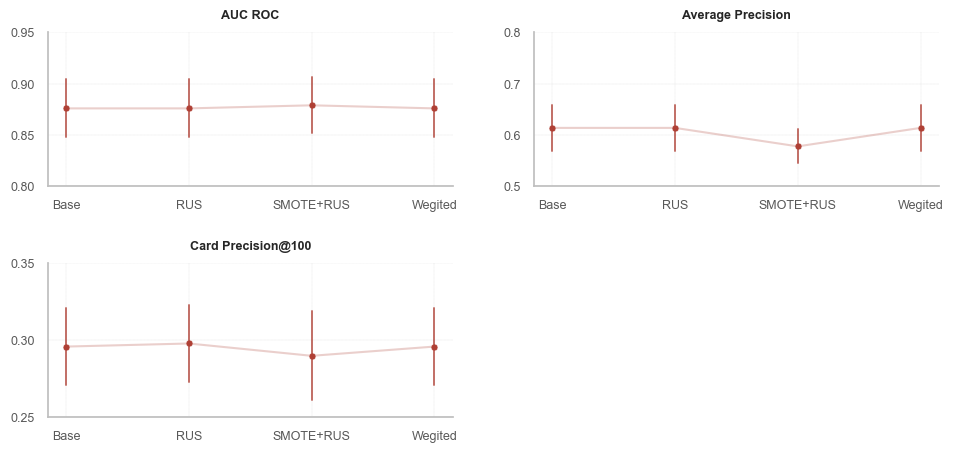

In [49]:
plot_unbalanced_model(
    data=unbalanced_lr,
    metrics_list=metrics,
    colors=[colors[0], colors[0], colors[0]],
    n_folds=4,
    limits_list=[[0.80, 0.96, 0.05],
                 [0.50, 0.81, 0.10],
                 [0.25, 0.36, 0.05]],
    save=True, filename='unbalanced_lr'
)

### Random Forest

In [21]:
rf_performance_list = [
    performance_rf_base,
    performance_rf_rus,
    performance_rf_smrus,
    performance_rf_weight
]

In [22]:
rf_exec_time_list = [
    exec_time_rf_base,
    exec_time_rf_rus,
    exec_time_rf_smrus,
    exec_time_rf_weight
]

In [23]:
results_rf_args = techniques_list, rf_performance_list, rf_exec_time_list

In [24]:
unbalanced_rf = (results_df_create(*results_rf_args).drop(cols_drop, axis=1))

In [25]:
unbalanced_rf

,AUC ROC,AUC ROC Std,Average Precision,Average Precision Std,Card Precision@100,Card Precision@100 Std
Base,0.873,0.0189,0.678,0.0292,0.306,0.0183
RUS,0.874,0.0244,0.678,0.0344,0.306,0.0182
SMOTE+RUS,0.875,0.0208,0.627,0.0339,0.300,0.0169
Wegited,0.873,0.0189,0.678,0.0292,0.306,0.0183


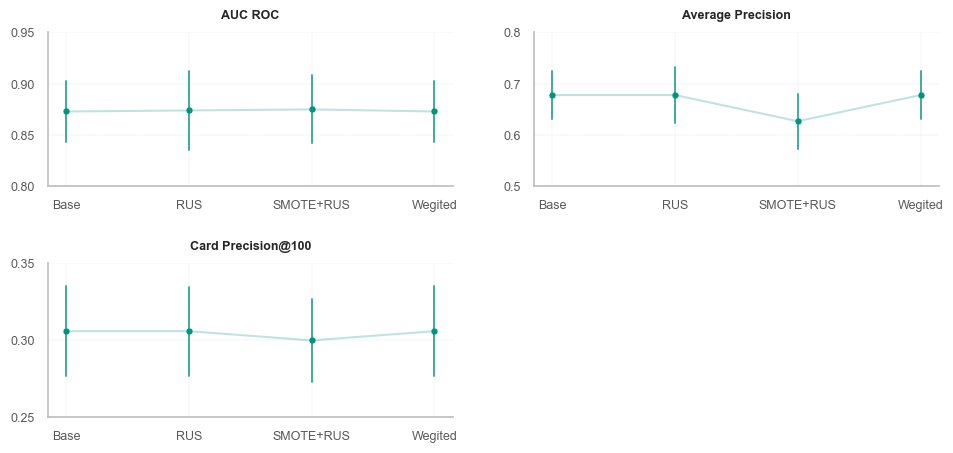

In [50]:
plot_unbalanced_model(
    data=unbalanced_rf,
    metrics_list=metrics,
    colors=[palette[2], palette[2], palette[2]],
    n_folds=4,
    limits_list=[[0.80, 0.96, 0.05],
                 [0.50, 0.80, 0.10],
                 [0.25, 0.36, 0.05]],
    save=True, filename='unbalanced_rf'
)

### XGBoost

In [27]:
xgb_performance_list = [
    performance_xgb_base,
    performance_xgb_rus,
    performance_xgb_smrus,
    performance_xgb_weight
]

In [28]:
xgb_exec_time_list = [
    exec_time_xgb_base,
    exec_time_xgb_rus,
    exec_time_xgb_smrus,
    exec_time_xgb_weight
]

In [29]:
results_xgb_args = techniques_list, xgb_performance_list, xgb_exec_time_list

In [30]:
unbalanced_xgb = (results_df_create(*results_xgb_args).drop(cols_drop, axis=1))

In [31]:
unbalanced_xgb

,AUC ROC,AUC ROC Std,Average Precision,Average Precision Std,Card Precision@100,Card Precision@100 Std
Base,0.875,0.0126,0.692,0.0309,0.306,0.0187
RUS,0.875,0.0141,0.692,0.0302,0.305,0.0179
SMOTE+RUS,0.860,0.0175,0.640,0.0222,0.300,0.0157
Wegited,0.877,0.0137,0.687,0.0305,0.305,0.0156


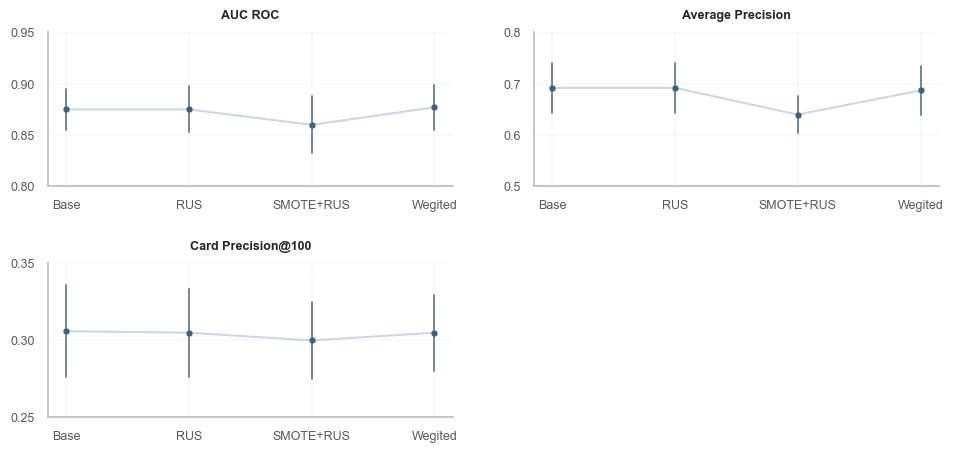

In [51]:
plot_unbalanced_model(
    data=unbalanced_xgb,
    metrics_list=metrics,
    colors=[palette[-7], palette[-7], palette[-7]],
    n_folds=4,
    limits_list=[[0.80, 0.96, 0.05],
                 [0.50, 0.80, 0.10],
                 [0.25, 0.36, 0.05]],
    save=True, filename='unbalanced_xgb'
)

### LightGBM

In [33]:
lgb_performance_list = [
    performance_lgb_base,
    performance_lgb_rus,
    performance_lgb_smrus,
    performance_lgb_weight
]

In [34]:
lgb_exec_time_list = [
    exec_time_lgb_base,
    exec_time_lgb_rus,
    exec_time_lgb_smrus,
    exec_time_lgb_weight
]

In [35]:
results_lgb_args = techniques_list, lgb_performance_list, lgb_exec_time_list

In [36]:
unbalanced_lgb = (results_df_create(*results_lgb_args).drop(cols_drop, axis=1))

In [37]:
unbalanced_lgb

,AUC ROC,AUC ROC Std,Average Precision,Average Precision Std,Card Precision@100,Card Precision@100 Std
Base,0.870,0.0120,0.647,0.0269,0.301,0.0163
RUS,0.873,0.0167,0.670,0.0371,0.306,0.0153
SMOTE+RUS,0.864,0.0160,0.637,0.0193,0.300,0.0133
Wegited,0.867,0.0142,0.627,0.0277,0.301,0.0146


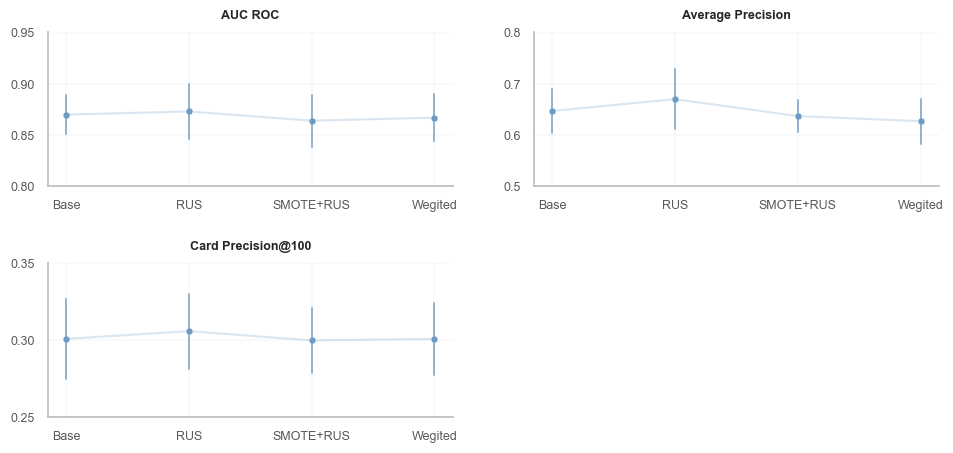

In [52]:
plot_unbalanced_model(
    data=unbalanced_lgb,
    metrics_list=metrics,
    colors=[palette[-9], palette[-9], palette[-9]],
    n_folds=4,
    limits_list=[[0.80, 0.96, 0.05],
                 [0.50, 0.80, 0.10],
                 [0.25, 0.36, 0.05]],
    save=True, filename='unbalanced_lgb'
)

In [39]:
unbalanced_list = [
    unbalanced_lr,
    unbalanced_rf,
    unbalanced_xgb,
    unbalanced_lgb
]

In [40]:
for df, model in zip(unbalanced_list, models_list):
    df['model'] = model

In [41]:
unbalanced_df_metric = pd.concat(unbalanced_list, axis=0)

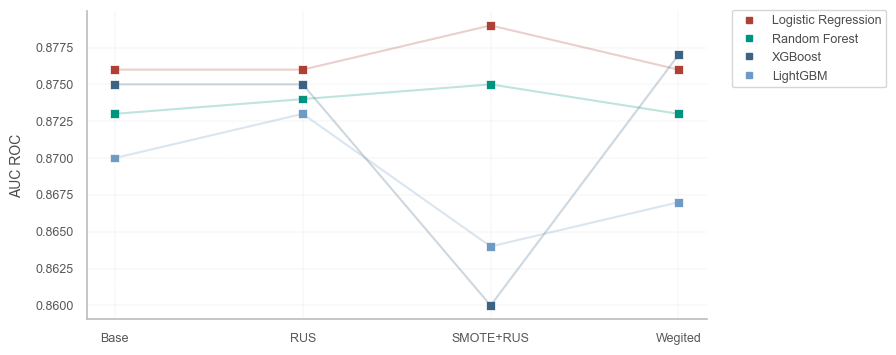

In [42]:
plot_unbalanced_metric(
    data=unbalanced_df_metric,
    metric='AUC ROC',
    colors=colors[:4],
    models_list=models_list,
    save=True,
    filename='unbalanced_roc_auc'
)

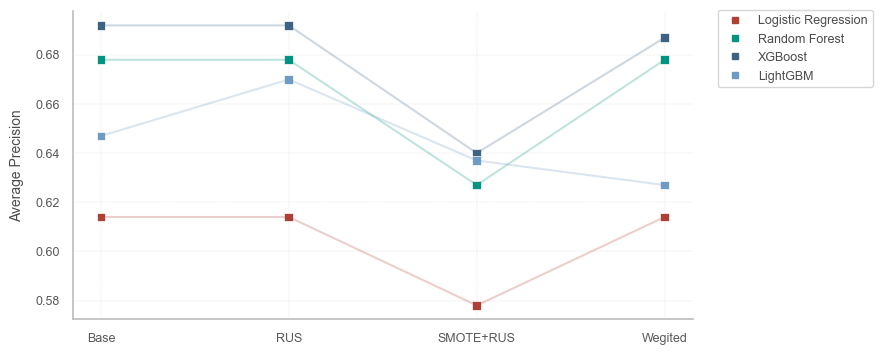

In [43]:
plot_unbalanced_metric(
    data=unbalanced_df_metric,
    metric='Average Precision',
    colors=colors[:4],
    models_list=models_list,
    save=True,
    filename='unbalanced_av_prec'
)

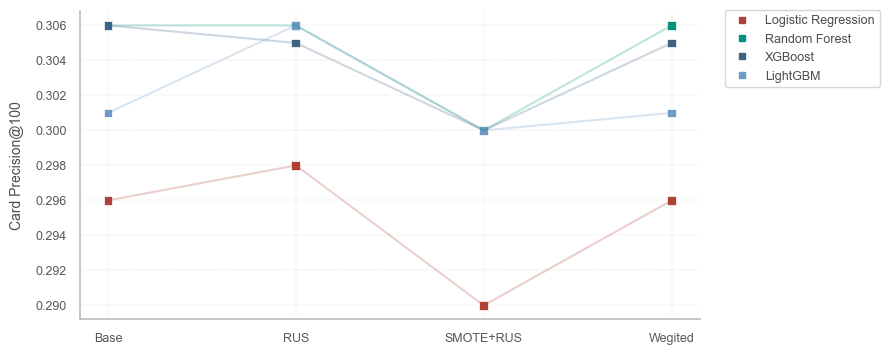

In [44]:
plot_unbalanced_metric(
    data=unbalanced_df_metric,
    metric='Card Precision@100',
    colors=colors[:4],
    models_list=models_list,
    save=True,
    filename='unbalanced_card_prec'
)

In [45]:
e_time = str(dt.timedelta(seconds=np.round(time.time() - t_script)))
print('Execution time: {}'.format(e_time))

Execution time: 0:00:47
